In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import random
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
data = pd.read_csv('train_clean.csv', index_col=0)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
y = data['Survived']
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
X.shape, y.shape

((891, 8), (891,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111, stratify=y)
X_train.shape, y_train.shape

((623, 8), (623,))

In [18]:
def toNumbers(data):
    X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
    X['Sex'] = (data['Sex'] == 'female')
    #X['isCabin'] = (data['Cabin'] != 'Unknown')
    X['Embarked'] = data['Embarked'].apply(ord)
    return X

In [19]:
X1_train = toNumbers(X_train)
X1_test = toNumbers(X_test)
X1_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
680,3,0.0,0,0,8.1375,True,81
810,3,26.0,0,0,7.8875,False,83
727,3,0.0,0,0,7.7375,True,81
775,3,18.0,0,0,7.7500,False,83
795,2,39.0,0,0,13.0000,False,83


In [20]:
clf1 = DecisionTreeClassifier(max_depth=7, random_state=11, min_impurity_decrease=0.002)
clf1.fit(X1_train, y_train)
clf1.score(X1_test, y_test)

0.7947761194029851

In [21]:
dot_data = export_graphviz(clf1, out_file=None, feature_names=X1_train.columns)
graph = graphviz.Source(dot_data)  
#graph 

In [22]:
def shift_0_age(age):
    if age == 0:
        return 30
    else:
        return age

def toNumbersAgeShift(data):
    X = toNumbers(data)
    X['Age'] = X['Age'].apply(shift_0_age)
    return X

In [23]:
X2_train = toNumbersAgeShift(X_train)
X2_test = toNumbersAgeShift(X_test)
X2_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
680,3,30.0,0,0,8.1375,True,81
810,3,26.0,0,0,7.8875,False,83
727,3,30.0,0,0,7.7375,True,81
775,3,18.0,0,0,7.7500,False,83
795,2,39.0,0,0,13.0000,False,83


In [24]:
clf2 = DecisionTreeClassifier(max_depth=7, random_state=5, min_impurity_decrease=0.002)
clf2.fit(X2_train, y_train)
clf2.score(X2_test, y_test)

0.8208955223880597

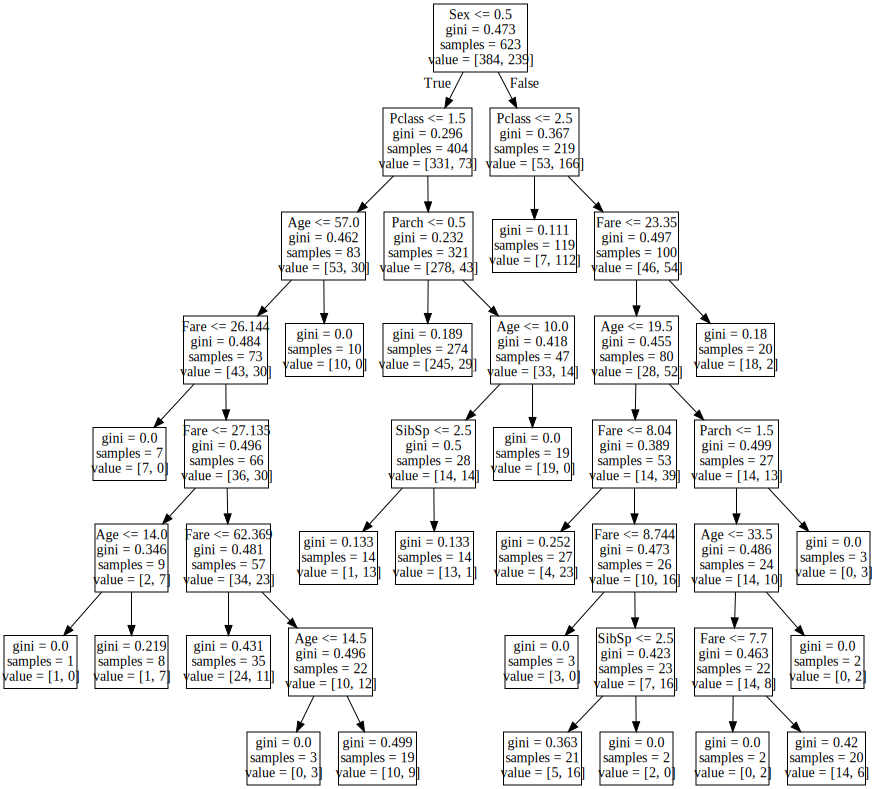

In [25]:
dot_data2 = export_graphviz(clf2, out_file=None, feature_names=X1_train.columns)
graph2 = graphviz.Source(dot_data2)  
graph 

In [30]:
params = {'max_depth': range(1, 20), 'min_samples_split': range(2,21)
          , 'min_impurity_decrease': [0, 0.01, 0.02, 0.03, 0.04] }

clf = GridSearchCV(DecisionTreeClassifier(), params, return_train_score=True, cv=5)
clf.fit(X1_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('Best parameters:', clf.best_params_)
print(clf.best_score_, accuracy_score(y_test, clf.predict(X1_test)))

0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 2}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 3}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 4}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 5}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 6}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 7}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 8}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 9}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 10}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 11}
0.798 (+/-0.115) for {'max_depth': 1, 'min_impurity_decrease': 0, 'min_samples_split': 12}
0.798 (

0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 11}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 12}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 13}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 14}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 15}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 16}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 17}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 18}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 19}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impurity_decrease': 0.02, 'min_samples_split': 20}
0.775 (+/-0.080) for {'max_depth': 17, 'min_impuri